# Isolation Forest Metrics Using http Subset

This program uses the precision, recall, fscore, and false alarm rate evaluation metrics for the Isolation Forest algorithm using the http subset. The following plots are produced below:

- Precision
- Recall
- Binary F1 Score
- Weighted F1 Score
- False Alarm Rate
- Grouped: Precision, Recall, Binary F1 Score
- Grouped: Precision, Recall Weighted F1 Score

(The x-axis represents the number of max samples and the y-axis represents the scores for the metrics)

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_kddcup99
import numpy as np

kdd99_data = fetch_kddcup99(subset='http')
X = kdd99_data['data']
y = kdd99_data['target']

y[y == b'normal.'] = 1
y[y != 1] = -1
y = np.int64(y)

In [2]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

recall_scores = []
precision_scores = []
f1_scores = []
# weighted_f1_scores = []
false_alarms = []

def calculations(n):
    
    isof = IsolationForest(max_samples=n, random_state=42)
    y_pred = isof.fit_predict(X)
    y_pred = np.array(y_pred)
    
    p = precision_score(y, y_pred, pos_label = -1)
    r = recall_score(y, y_pred, pos_label = -1)
    f = f1_score(y, y_pred, pos_label = -1)
#     wf = f1_score(y, y_pred, average = 'weighted')
    
    tn, fp, fn, tp = confusion_matrix(y,y_pred).ravel()
    false_alarm = fp/(fp+tn) 
    
    recall_scores.append(r)
    precision_scores.append(p)
    f1_scores.append(f)
#     weighted_f1_scores.append(wf)
    false_alarms.append(false_alarm)

In [3]:
ilist = []
i = 1
while i<5000:
    calculations(i)
    ilist.append(i)
    i=i*2

c:\users\kajia\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\ensemble\_iforest.py:473: RuntimeWarning: invalid value encountered in true_divide
  -depths
c:\users\kajia\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\ensemble\_iforest.py:336: RuntimeWarning: invalid value encountered in less
  is_inlier[self.decision_function(X) < 0] = -1
c:\users\kajia\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\kajia\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [4]:
print('Number of Max Samples: ', ilist)

Number of Max Samples:  [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096]


In [5]:
print(X.shape)

(58725, 3)


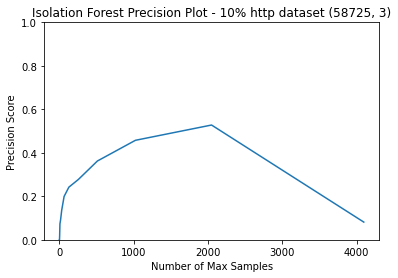

In [6]:
# Precision
plt.plot(ilist, precision_scores)
plt.xlabel('Number of Max Samples')
plt.ylabel('Precision Score')
plt.title('Isolation Forest Precision Plot - 10% http dataset (58725, 3)')

plt.ylim((0, 1))

plt.show()

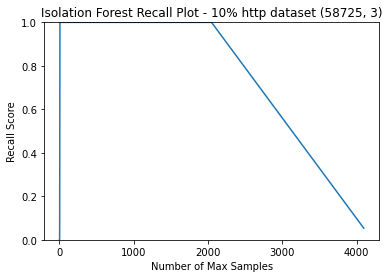

In [7]:
# Recall
plt.plot(ilist, recall_scores)
plt.xlabel('Number of Max Samples')
plt.ylabel('Recall Score')
plt.title('Isolation Forest Recall Plot - 10% http dataset (58725, 3)')

plt.ylim((0, 1))

plt.show()

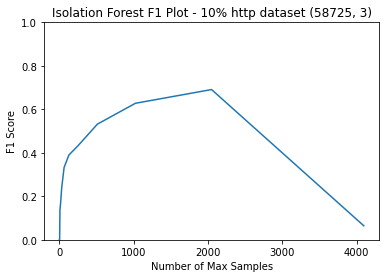

In [8]:
# Binary F1 Score
plt.plot(ilist, f1_scores)
plt.xlabel('Number of Max Samples')
plt.ylabel('F1 Score')
plt.title('Isolation Forest F1 Plot - 10% http dataset (58725, 3)')

plt.ylim((0, 1))

plt.show()

In [9]:
# # Weighted F1 Score
# plt.plot(ilist, weighted_f1_scores)
# plt.xlabel('Number of Max Samples')
# plt.ylabel('Weighted F1 Score')
# plt.title('Isolation Forest Weighted F1 Plot - 10% http dataset (58725, 3)')

# plt.ylim((0, 1))

# plt.show()

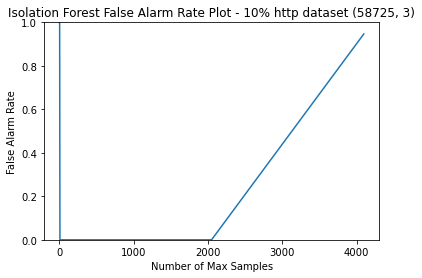

In [10]:
# False Alarm
plt.plot(ilist, false_alarms)
plt.xlabel('Number of Max Samples')
plt.ylabel('False Alarm Rate')
plt.title('Isolation Forest False Alarm Rate Plot - 10% http dataset (58725, 3)')

plt.ylim((0, 1))

plt.show()

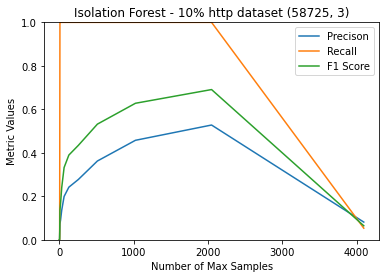

In [11]:
# Grouped - Precision, Recall, Binary F1
plt.plot(ilist, precision_scores, label='Precison')
plt.plot(ilist, recall_scores, label='Recall')
plt.plot(ilist, f1_scores, label = 'F1 Score')
    
plt.xlabel('Number of Max Samples')
plt.ylabel('Metric Values')
plt.title('Isolation Forest - 10% http dataset (58725, 3)')
    
leg = plt.legend();

plt.ylim((0, 1))

plt.show()

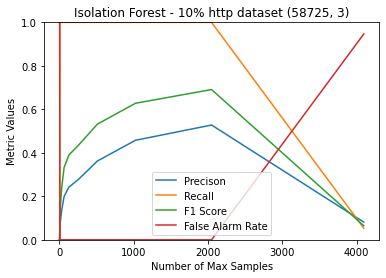

In [12]:
# Grouped - Precision, Recall, Binary F1, False Alarm
plt.plot(ilist, precision_scores, label='Precison')
plt.plot(ilist, recall_scores, label='Recall')
plt.plot(ilist, f1_scores, label = 'F1 Score')
plt.plot(ilist, false_alarms, label = 'False Alarm Rate')
    
plt.xlabel('Number of Max Samples')
plt.ylabel('Metric Values')
plt.title('Isolation Forest - 10% http dataset (58725, 3)')
    
leg = plt.legend();

plt.ylim((0, 1))

plt.show()

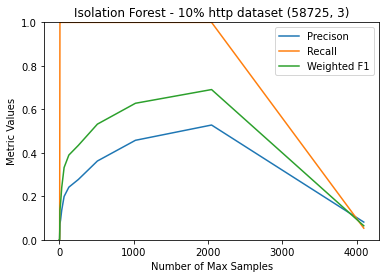

In [13]:
# Grouped - Precision, Recall, Weighted F1
plt.plot(ilist, precision_scores, label='Precison')
plt.plot(ilist, recall_scores, label='Recall')
plt.plot(ilist, f1_scores,label='Weighted F1')
    
plt.xlabel('Number of Max Samples')
plt.ylabel('Metric Values')
plt.title('Isolation Forest - 10% http dataset (58725, 3)')
    
leg = plt.legend();

plt.ylim((0, 1))

plt.show()

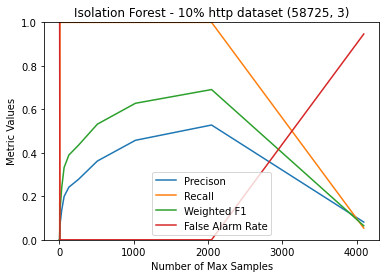

In [14]:
# Grouped - Precision, Recall, Weighted F1, False Alarm Rate
plt.plot(ilist, precision_scores, label='Precison')
plt.plot(ilist, recall_scores, label='Recall')
plt.plot(ilist, f1_scores,label='Weighted F1')
plt.plot(ilist, false_alarms, label = 'False Alarm Rate')
    
plt.xlabel('Number of Max Samples')
plt.ylabel('Metric Values')
plt.title('Isolation Forest - 10% http dataset (58725, 3)')
    
leg = plt.legend();

plt.ylim((0, 1))

plt.show()